In [1]:
%pwd

'D:\\Data\\Single cell seq\\mouse_pfc\\manuscript\\github\\mpfc_projectome\\10_machine_learning_implementation\\pacaret_new'

In [2]:
#Run the below code in your notebook to check the installed version
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
plt.rcParams['pdf.fonttype'] = 'truetype'
import numpy as np

In [3]:
df=pd.read_csv('../var50_BLA_valid_binary_normdata_allcells.csv')

In [4]:
df.head()

,Tshz2,Cplx3,Npy,Myl4,Pbld1,Gm13889,Ptgs2,Dlk1,Lypd1,Nr4a2,Etv1,Cck,Cyr61,Pou3f1,Egr4,Nnat,Aldh1a3,Stxbp6,Arl4d,Synpr,Bdnf,Marcksl1,Gadd45g,S100a6,Gadd45b,Gm45833,Gm10635,C1ql3,Hspa1a,Rab3c,Htr2c,Adamts1,Rprm,Nptxr,Pdyn,Btg2,Rorb,Rxfp1,Defb1,Rgs5,Bc1,Vip,Calb1,Fam19a1,Cnr1,Ctgf,Npas4,Ighm,Gpr88,Ptn,binary
0,0.000000,0.0,0.000000,0.000000,0.0,1.147602,0.0,0.0,0.000000,1.147602,1.147602,4.931883,0.000000,0.0,3.963004,0.000000,0.0,0.0,0.000000,2.901699,2.464121,1.667945,1.667945,0.0,2.464121,0.0,0.0,3.921270,0.000000,2.632161,0.000000,0.0,1.147602,3.113795,0.0,2.464121,2.008468,2.464121,0.0,1.147602,2.901699,0.0,0.000000,2.632161,3.437491,0.000000,2.901699,0.0,0.0,0.000000,0
1,0.000000,0.0,0.000000,1.736971,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.205988,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.205988,0.0,0.000000,0.0,0.0,0.000000,1.205988,1.205988,0.000000,0.0,3.960456,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.736971,0.0,0.000000,0.000000,1.205988,0.000000,0.000000,0.0,0.0,0.000000,0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.038546,1.171391,1.171391,0.000000,1.696158,0.0,3.146940,3.399336,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.171391,0.0,1.696158,0.0,0.0,0.000000,2.664367,1.171391,1.171391,0.0,3.600694,1.696158,0.0,3.537974,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.696158,1.696158,0.0,0.0,0.000000,0
3,0.000000,0.0,3.035425,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.236935,0.000000,0.0,0.000000,4.299134,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.163492,0.0,0.000000,0.0,0.0,3.035425,0.000000,2.653703,0.000000,0.0,0.000000,3.704252,0.0,0.000000,0.000000,3.227320,0.0,0.000000,2.653703,0.0,1.163492,0.000000,1.686803,0.000000,1.163492,0.0,0.0,1.163492,0
4,4.304573,0.0,1.577758,4.004004,0.0,0.000000,0.0,0.0,4.355191,0.000000,4.304573,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.577758,0.000000,2.161962,3.328934,0.000000,0.0,0.000000,0.0,0.0,1.577758,0.000000,2.528305,3.328934,0.0,1.577758,2.795837,0.0,3.006693,0.000000,0.000000,0.0,0.000000,1.577758,0.0,0.000000,0.000000,1.577758,0.000000,0.000000,0.0,0.0,1.577758,0


In [5]:
df['binary'].value_counts()

0    9039
1     329
Name: binary, dtype: int64

In [6]:
exp1 = setup(df, target = 'binary',session_id=1,silent=True)

,Description,Value
0,session_id,1
1,Target,binary
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9368, 51)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6326,0.8573,0.9565,0.0840,0.1544,0.0961,0.2168
1,0.6174,0.8268,0.9565,0.0809,0.1492,0.0903,0.2097
2,0.6052,0.7759,0.9130,0.0755,0.1395,0.0799,0.1887
3,0.6235,0.8811,1.0000,0.0852,0.1570,0.0988,0.2279
4,0.6494,0.8294,0.9565,0.0876,0.1606,0.1030,0.2251
5,0.6326,0.8128,0.9565,0.0840,0.1544,0.0961,0.2168
6,0.6250,0.8489,1.0000,0.0855,0.1575,0.0994,0.2286
7,0.6412,0.8222,1.0000,0.0856,0.1577,0.1021,0.2320
8,0.6229,0.8361,1.0000,0.0818,0.1512,0.0950,0.2233
9,0.6031,0.7206,0.7727,0.0625,0.1156,0.0570,0.1352


In [8]:
Xtest = get_config('X_test')
ytest = get_config('y_test')
X_train = get_config('X_train')
y_train = get_config('y_train')

In [9]:
sample_size=100
sub_sampled_train_data = shap.sample(X_train, sample_size, random_state=0)
sub_sampled_test_data = shap.sample(Xtest, sample_size, random_state=0)

In [10]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(nb.predict, sub_sampled_train_data)## nb,predict_proba generates barplot

In [11]:
shap_values = explainer.shap_values(sub_sampled_test_data)

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
np.save("bla_shap_values_allcells.npy", shap_values)
#pd.DataFrame(shap_values).to_csv("lh_shap_values_500cells.csv")

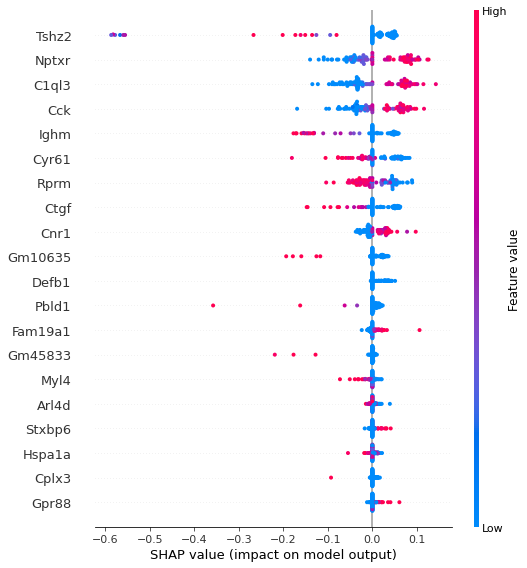

In [13]:
shap.summary_plot(shap_values, sub_sampled_test_data,show=False)
plt.savefig("BLA var shap plot nb .pdf",dpi=1000)

In [14]:
save_model(nb, model_name='model_BLA_20220921')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='binary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='binary')),
                 ('fix_perfect', Remove_100(target='binary')),
                 ('clean_names', 